In [4]:
import scipy.stats as stats
import numpy as np
import random
#import tabulate
import csv
import matplotlib.pyplot as plt

random.seed(1234567)
plt.style.use('bmh')

## Iris de Fisher
Ce jeu de données a été présenté en 1936 par Ronald Fisher comme un exemple d'application. Ces données ont été collectés par Edgar Anderson : "Toutes sont du même champ, cueillies le même jour et mesurées le même jour par la même personne avec les mêmes outils de mesures".

Le jeu de données comprend 50 échantillons de chacune des trois espèces d'iris (Iris setosa, Iris virginica et Iris versicolor).  Quatre caractéristiques ont été mesurées à partir de chaque échantillon : la longueur et la largeur des sépales et des pétales, en centimètres.

<figure>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg/800px-Kosaciec_szczecinkowaty_Iris_setosa.jpg" alt="setosa" style="width: 200px;"/>
<center> <figcaption>Setosa </figcaption> </center>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/41/Iris_versicolor_3.jpg/1280px-Iris_versicolor_3.jpg" alt="versicolor" style="width: 200px;"/>
<center> <figcaption>Versicolor </figcaption> </center>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Iris_virginica.jpg/1024px-Iris_virginica.jpg" alt="viginica" style="width: 200px;"/>
<center> <figcaption>Virginica </figcaption> </center>
</figure>

In [5]:
def read_iris_data_set(testsetfrac=.33333, dump=False):
    """
    read, reformat, shuffle and split data between trainning and test sets
    
    inputs:
        - testsetfrac: fraction of data to be used for the test set
        - dump: dump data if True
    
    return: trainning set, test set
    """
    
    # read data
    dataset = list(csv.reader(open('iris_dataset.csv','r')))
    
    # dump data
    if dump:
        varnames = ['sepal length [cm]', 'sepal width [cm]', 'petal length [cm]', 'petal width [cm]', 'class']
        print ('nombre de données', len(dataset))
        print (tabulate.tabulate(dataset, varnames))
    
    # reformat data
    convert = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2 }
    for row in dataset:
        for line in range(len(row)-1):
            row[line] = float(row[line])
        row[len(row)-1] = convert[row[len(row)-1]]
        
    # shuffle and split data
    random.shuffle(dataset)
    ntest = int(round(len(dataset)*testsetfrac))
    
    return np.array(dataset[ntest:]), np.array(dataset[:ntest])

train_set, test_set = read_iris_data_set()

In [6]:
np.std(train_set[:,:4], axis=0)

array([0.80300125, 0.451482  , 1.72709699, 0.74650854])

In [7]:
sig = np.std(train_set[...,:4], axis=0)
sig

array([0.80300125, 0.451482  , 1.72709699, 0.74650854])

In [8]:
nvar = 4
data = test_set[43]
distances = [(np.sum(np.square(data[:nvar]-x[:nvar])/sig**2), x[-1]) for x in train_set]

In [9]:
distances

[(8.08519100334724, 1.0),
 (10.59043683660245, 1.0),
 (0.31991257231059894, 0.0),
 (10.979726645628784, 2.0),
 (7.393096392822455, 1.0),
 (0.06791995048093359, 0.0),
 (13.494068618197952, 2.0),
 (13.54778562569508, 1.0),
 (21.748332942136972, 2.0),
 (15.347563860977264, 1.0),
 (10.580422709345967, 2.0),
 (0.4501794857479345, 0.0),
 (13.235823849428805, 2.0),
 (7.577436244379084, 1.0),
 (12.92719930946263, 2.0),
 (5.783263442043424, 1.0),
 (6.980959563028141, 1.0),
 (0.22640853430952898, 0.0),
 (0.07513033027639536, 0.0),
 (0.3391644552639371, 0.0),
 (27.690842879379463, 2.0),
 (14.654492417464908, 2.0),
 (8.022065822714762, 1.0),
 (7.1219084576563905, 1.0),
 (9.285735070676068, 1.0),
 (19.624878595193316, 2.0),
 (9.065752901901238, 1.0),
 (1.7881318001377622, 0.0),
 (0.08041344021837996, 0.0),
 (0.8183976416997981, 0.0),
 (18.298396446179154, 2.0),
 (0.5069175911276084, 0.0),
 (11.389021252236446, 1.0),
 (0.23947755563877243, 0.0),
 (19.24410789121952, 2.0),
 (32.13476472387658, 2.0),


In [10]:
distances.sort()

In [13]:
distances[:11]

[(0.05241153018413355, 0.0),
 (0.06538616390179981, 0.0),
 (0.06538616390179981, 0.0),
 (0.06791995048093359, 0.0),
 (0.07513033027639536, 0.0),
 (0.08041344021837996, 0.0),
 (0.08586441237138263, 0.0),
 (0.11567340462078664, 0.0),
 (0.19958867259273683, 0.0),
 (0.22640853430952898, 0.0),
 (0.23947755563877243, 0.0)]

In [14]:
def k_nearest_neighbors(data, test_instance, knn):
    """
    methode des k plus proches voisins :
        - data : données d'entrainement
        - test_instance : donnée pour laquelle on veut estimer la classe
        - knn : nombre de plus proches voisins à utiliser
    """
    nvar = len(data[0])-1
    # compute the standart deviation for each variable
    sig = np.std(data[:,:nvar], axis=0)  # sig = [sig_0, sig_1, ..., sig_(nvar-1)]
    
    # compute nomalized distances between training set and test instance
    # distances = [[dist_0, classe_0], [dist_1, classe_1], ..., [dist_(ndata-1), classe_(ndata-1)]]
    distances = [(np.sum(np.square(x[:nvar]-test_instance[:nvar])/sig**2), x[-1]) for x in data]  
    
    # sort distances 
    distances.sort(key=lambda d: d[0])
    
    # list of classes for the k nearest neighbors
    classes = [d[1] for d in distances[:knn]]
    
    # return the class with most similar instances
    categories, counts = np.unique(classes, return_counts=True)
    return categories[np.argmax(counts)]


In [15]:
for i in range(10):
    print (k_nearest_neighbors(train_set, test_set[i], 9), test_set[i][-1])

1.0 1.0
1.0 1.0
0.0 0.0
2.0 2.0
2.0 2.0
0.0 0.0
0.0 0.0
1.0 1.0
2.0 2.0
1.0 1.0


## Perfomance du classifieur
La fonction suivante va pertmettre d'estimer la performance du classifieur sur les données tests :

In [16]:
def accuracy(classifier, test_data):
    """
    compute accuracy of the classifier on test_data
    
    input:
        - classifier: 
        - test_data
    
    return: fraction of instances with good predictions
    """
    X = np.array(test_data)
    Y = [classifier(data) for data in X]
    diff = np.array(Y)-np.array(X[:,-1])  # X[:,-1] == last column of X
    return float(list(diff).count(0))/len(diff)  # count the occurence of zeros in the array

In [17]:
print ('accuracy = %.2f%%'%(100*accuracy(lambda x:k_nearest_neighbors(train_set, x, 11), test_set)))

accuracy = 98.00%


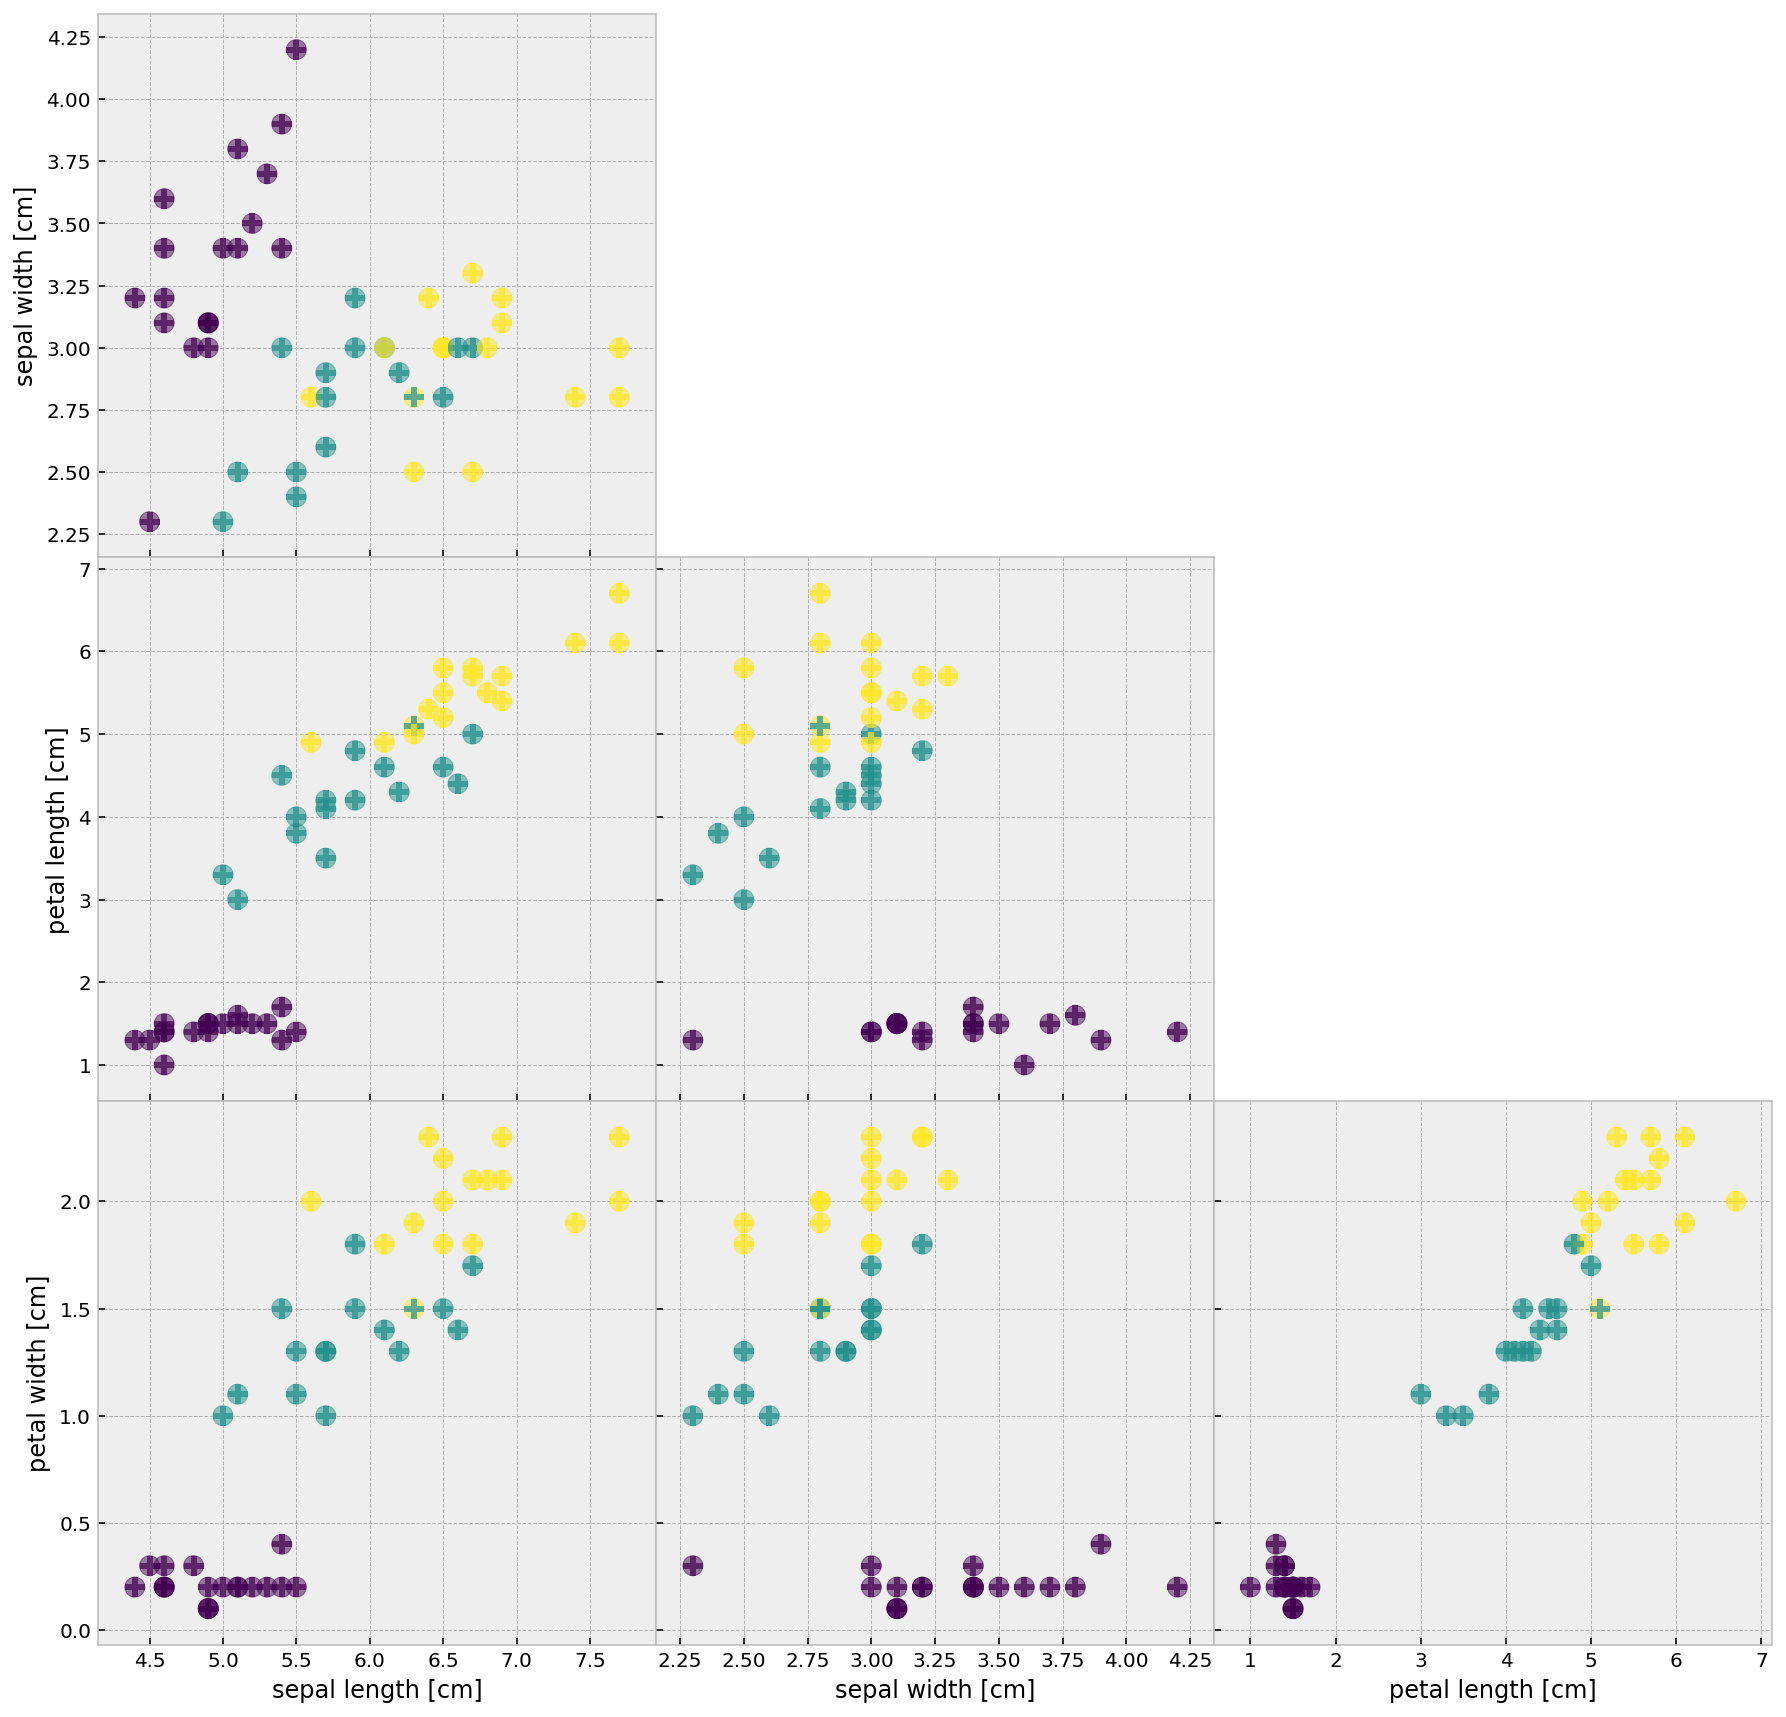

In [18]:
from matplotlib import patches, colors
varnames = ['sepal length [cm]', 'sepal width [cm]', 'petal length [cm]', 'petal width [cm]', 'class']
X = np.array(test_set)
Y = [k_nearest_neighbors(train_set, data, 11) for data in test_set]
dim = len(test_set[0])-1
fig, ax = plt.subplots(dim-1,dim-1,figsize=(15,15),sharex='col',sharey='row')
for i in range(dim-1):
    for j in range(dim-1):
        if j>i: 
            ax[i][j].set_visible(False)
        else:
            ax[i][j].scatter(X[:, j], X[:, i+1], c=X[:,-1], s=100, alpha=.5)
            ax[i][j].scatter(X[:, j], X[:, i+1], c=Y, s=100, zorder=10, marker='+', lw=3, alpha=.7)
            if i==2: ax[i][j].set_xlabel(varnames[j])
            if j==0: ax[i][j].set_ylabel(varnames[i+1])
plt.subplots_adjust(wspace=0., hspace=0.)
plt.show()

### Validation croisée
L'une des méthodes fondamentales dans l'apprentissage automatique pour l'évaluation des méthodes et la sélection des paramètres est ce qui est appelée validation croisée (cross validation). 

Lorsque l'algorithme d'apprentissage a un paramètre ajustable (ici le nombre de voisins les plus proches), if faut trouver une méthodologie pour choisir une valeur optimale pour ce paramètre. On peut tester certaines valeurs, puis choisir celle qui donne le meilleur résultat sur nos données de test. Cependant, le risque est que cela mène à un ajustement excessif (surentrainement) sur les données test. 

La validation croisée consiste à rééchantillonner les données en $N$ sous-groupes. On fait $N$ évaluations de la performance en prenant successivement 1 sous-groupe pour évaluer la performance de l'algorithme entrainé avec les $N-1$ autres sous-groupes. La performance est donnée par la moyenne sur les $N$ évaluations.


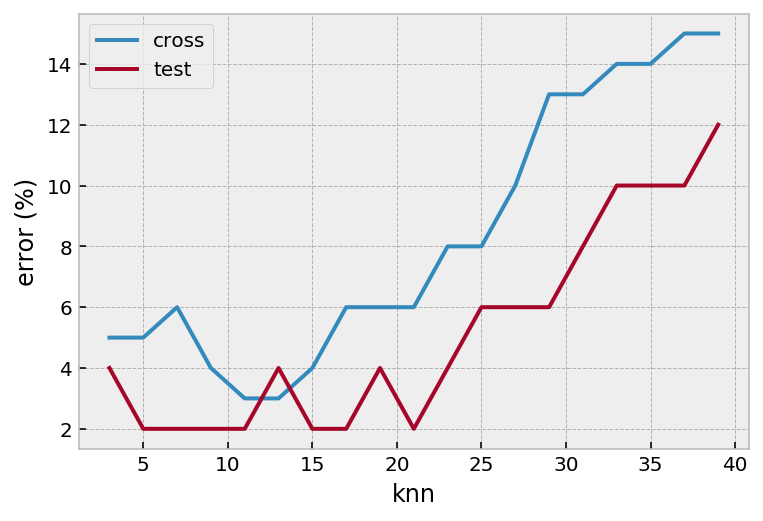

In [19]:
def cross_validation(train_set, knn, cvn=10):
    folds = [train_set.tolist()[i::cvn] for i in range(cvn)]
    acc = []
    for i in range(cvn):
        train_set = []
        for ifold, fold in enumerate(folds):
            if ifold==i:
                validation_set = fold
            else:
                train_set = train_set + fold
        acc.append(accuracy(lambda x:k_nearest_neighbors(np.array(train_set),x,knn), validation_set))
    return np.mean(acc)

xk = np.arange(3,40,2)
y = [100.*(1.-cross_validation(train_set,xx,10)) for xx in xk]
ytest = [100.*(1-accuracy(lambda x:k_nearest_neighbors(train_set,x,kk), test_set)) for kk in xk]

plt.plot(xk,y,label='cross')
plt.plot(xk,ytest, label='test')
plt.legend()
plt.xlabel('knn')
plt.ylabel('error (%)')
plt.show()